$$
\newcommand{\mymat}[1]{
\left[
\begin{array}{rrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}
#1
\end{array}
\right]
}
\newcommand{\myp}[1]{\left( #1 \right)}
\newcommand{\myb}[1]{\left[ #1 \right]}
\newcommand{\myv}[1]{\left< #1 \right>}
\newcommand{\mys}[1]{\left\{ #1 \right\}}
\newcommand{\myab}[1]{\left| #1 \right|}
\newcommand{\bx}{{\bf x}}
\newcommand{\by}{{\bf y}}
\newcommand{\bu}{{\bf u}}
\newcommand{\bv}{{\bf v}}
$$


#Lecture 1 

***

Linear algebra is the workhorse of mathematics, especially in the computational sciences.  In most computer simulations (physics simulation, big data analysis, Netflix, Google, video and audio compression, etc) 99% of simulation time is spent solving linear algebraic sytems.

But how can this be? In high school you were mostly exposed to very tiny matrices.  2x2's, 3x3's, maybe 4x4's if your teacher was really mean.  But in real engineering applications you have to think bigger.  The algorithm that Netflix uses to decide what movies to recommend to its users involves analyzing a gigantic matrix where the rows represent each movie in the Netflix library and the columns represent each of their user's ratings of those movies.  To determine which webpages should come first in a Google search, they build a big matrix where each row and column represent a page on the web.  At last count (depending on the source) there were 30-50 **billion** pages in Google's search index.  That means it Google has to do analysis on a 30-50 billion by 30-50 billion matrix! 

So, Google, big data, physics simulations... all of these things positively rely on sophisticated linear algebra techniques.  But before we can get to any of these, we need to have a firm grasp on the basic principles, which is what we'll cover in this class. 

##Vectors 

What is a vector?  

In the most general setting, a vector is just a list of numbers.  For example 

<br>

$$
{\bf u} = 
\mymat{
4 \\
-1
}
\quad \textrm{or} \quad
{\bf v} = 
\mymat{
1 \\ 
3 \\ 
5
}
$$

<br>

Typically we'll represent vectors using bold lowercase letters (usually, ${\bf x}, \hspace{1mm} {\bf y},\hspace{1mm} {\bf u}, \hspace{1mm} {\bf v}$ or ${\bf w}$).  

The quantity or object that a vector represents differs dramatically by application.  In data science it's typical for a vector to genually represent a list of values.  Consider the vector 

<br>


$$
{\bf w} = 
\mymat{
5 \\
250,000 \\
95,000\\
4 
}
$$

<br>


The vector ${\bf w}$ might represent responses to a survey, where each entry represents the answer to a particular question.  For instance, the first entry of ${\bf w}$ might be the number of people in the household, the second entry might be the value of their home, the third might be the household income, and the fourth might be the number of years of college education members of the household have had.

OK, so vectors are a handy way of storing lists of information, but there's not really any math there.  We want to do things like add, subtract, and multiply vectors.  Let's start with adding.  

There are a couple of simple rules for adding vectors. The first is that you can only add vectors if they have the same length.  The second is that vector addition is **element-wise**, meaning that to add two vectors ${\bf u}$ and ${\bf v}$ you add their corresponding elements together.  

<br>


$$
{\bf u} + {\bf v} = 
\mymat{
u_1 \\
u_2 \\
u_3 \\ 
}
+
\mymat{
v_1 \\
v_2 \\
v_3 \\ 
}
= 
\mymat{
u_1 + v_1 \\
u_2 + v_2 \\
u_3 + v_3 \\ 
}
$$

<br>


Note that we reprsent the individual elements of a vector using the same non-bold letter as the vector's name with subscripts indicating the position in the vector. 

OK, so why does this work?  It's best illustrated with an example: 

###Example 1
Suppose that a produce delivery service has two trucks, cleverly named Truck ${\bf x}$ and ${\bf y}$.  Suppose that Truck ${\bf x}$ can hold 5 crates of apples, 4 crates of oranges, and 3 crates of bananas.  Truck ${\bf y}$ is a bit bigger, so it can hold 7 crates of apples, 5 crates of oranges, and 4 crates of bananas.  We can represent the capacity of each truck using vectors: 

<br>


$$
\bx = 
\mymat{
5 \\
4 \\
3 
},
\quad \quad
\by = 
\mymat{
7 \\
5 \\
4
}
$$

<br>


Suppose you send both trucks fully loaded to make a fruit delivery to one store.  How many crates of each fruit does the store receive?  

Well, the answer seems pretty obvious, you need to add up the number of crates of each fruit.  This is exactly vector addition

<br>


$$
\bx + \by = 
\mymat{
5 \\
4 \\
3 
}
+
\mymat{
7 \\
5 \\
4
}
= 
\mymat{
12 \\
9 \\
7
}
$$
$\square$
<br>


We can also multiply vectors by scalars.  This is again done elementwise: 

<br>


$$
c ~\bx = c 
\mymat{
x_1 \\
x_2 \\
x_3 
} = 
\mymat{
c x_1 \\
cx_2 \\
cx_3
}
$$

<br>


###Example 2 
Suppose a customer has a particularly large fruit order that requires Truck ${\bf x}$ to make three trips to the location.  How many crates of each fruit does the order contain? 

<br>


$$
3~\bx = 
3 \mymat{
5 \\ 
4 \\
3
} =
\mymat{
15 \\
12 \\
9
}
$$
$\square$

<br>


###Example 3 
Suppose that another customer has such a huge order that it requires multiple trips from each of the two trucks.  In particular the order requires 2 trips from Truck ${\bf x}$ and 4 trips from Truck ${\bf y}$.  How many crates of each fruit does this order contain? 

<br>


$$
2~\bx + 4~\by = 
2\mymat{
5 \\ 
4 \\
3 \\
} + 
4 \mymat{
7 \\
5 \\
4
} = 
\mymat{
10 \\ 
8 \\
6 \\
} + 
\mymat{
28 \\
20 \\
16
} = 
\mymat{
38 \\
28 \\
22
}
$$
$\square$

<br>


This combination of vectors of the form $c~\bx + d~\by$ is called a **linear combination** and is at the heart of of just about everything in linear algebra. 

OK, so now we've seen the two most basic forms of vector arithmetic in the context of lists of items.  The other interpretations of vectors is the one used in physics.  We'll talk about it a lot in this course because it provides a geometric interpretation of vectors that can be extremely helpful. 

In physics vectors represent quantities that have a **magnitude** and a **direction**. Lots of things in physics get measured purely in amounts, and aren't represented by vectors.  Things like mass, time, temperature, etc. But a ton of stuff in physics have both magnitudes and directions.  Things like displacement, velocity, force, etc. 

Consider the vectors $\bu$ and $\bv$ given by 

<br>


$$
\bu = 
\mymat{1 \\ 2}, \quad
\bv = 
\mymat{3 \\ 1}
$$

<br>


We can represent $\bu$ and $\bv$ graphically if we think of the first entry in each vector as an x-coordinate and the second entry as a y-coordinate.  We then draw the vector as an arrow that starts at the origin and ends at the point indicated by the entries.  The vectors $\bu$ and $\bv$ look as follows

In [1]:
using PyPlot

INFO: Loading help data...


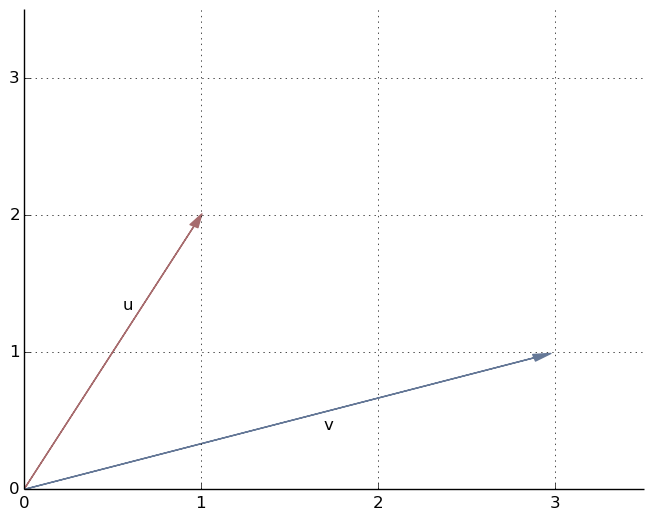

In [2]:
mycolors = {"green"=>"#6a9373","red"=>"#a76c6e","blue"=>"#657897"}
u = [1;2]
v = [3;1]
sf = 0.96
arrow(0, 0, sf*u[1], sf*u[2], head_width=0.05, head_length=0.1, fc=mycolors["red"], ec=mycolors["red"])
figtext(.25,.40,"u")
arrow(0, 0, sf*v[1], sf*v[2], head_width=0.05, head_length=0.1, fc=mycolors["blue"], ec=mycolors["blue"])
figtext(.5,.20,"v")
ax = gca()
ax[:set_ylim]([0,3.5])
ax[:set_xlim]([0,3.5])
ax[:spines]["top"][:set_color]("none") 
ax[:spines]["right"][:set_color]("none") 
ax[:xaxis][:set_ticks_position]("bottom")
ax[:yaxis][:set_ticks_position]("left")
ax[:xaxis][:grid]("True")
ax[:yaxis][:grid]("True")
yticks([0, 1, 2, 3],)
xticks([0, 1, 2, 3],)
margins(0.3);

Adding vectors graphicall is interpretted as putting the vectors *tip-to-tail* and then drawing a new vector from the origin to the terminal point of the combined vectors.  

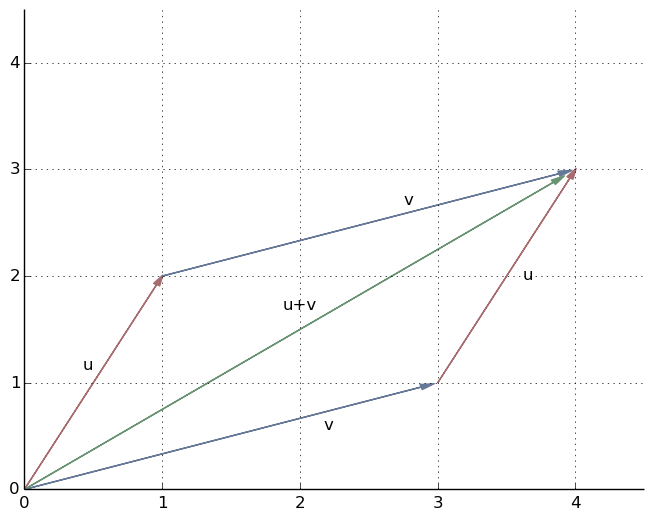

In [4]:
u = [1;2]
v = [3;1]
upv = u+v
sf = 0.96
arrow(0, 0, sf*u[1], sf*u[2], head_width=0.05, head_length=0.1, fc=mycolors["red"], ec=mycolors["red"])
figtext(.20,.30,"u")
arrow(0, 0, sf*v[1], sf*v[2], head_width=0.05, head_length=0.1, fc=mycolors["blue"], ec=mycolors["blue"])
figtext(.50,.20,"v")
arrow(u[1], u[2], sf*v[1], sf*v[2], head_width=0.05, head_length=0.1, fc=mycolors["blue"], ec=mycolors["blue"])
figtext(.75,.45,"u")
arrow(v[1], v[2], sf*u[1], sf*u[2], head_width=0.05, head_length=0.1, fc=mycolors["red"], ec=mycolors["red"])
figtext(.6,.575,"v")
arrow(0, 0, sf*upv[1], sf*upv[2], head_width=0.05, head_length=0.1, fc=mycolors["green"], ec=mycolors["green"])
figtext(.45,.4,"u+v")
ax = gca()
ax[:set_ylim]([0,4.5])
ax[:set_xlim]([0,4.5])
ax[:spines]["top"][:set_color]("none") 
ax[:spines]["right"][:set_color]("none") 
ax[:xaxis][:set_ticks_position]("bottom")
ax[:yaxis][:set_ticks_position]("left")
ax[:xaxis][:grid]("True")
ax[:yaxis][:grid]("True")
yticks([0, 1, 2, 3, 4],)
xticks([0, 1, 2, 3, 4],)
margins(0.3);

Notice that it doesn't matter in which order you put the vectors tip-to-tail, just like in the algebraic view of vector addition, the process is *associative*.  You can see in the image above that the combination in either order produces a parallelogram with the resulting sum on the diagonal.  For this reason the associative rule of vector addition is sometimes called the **Parallelogram Law**. 

Multiplication of a vector by a scalar pictorially is pretty simple.  The direction of the vector does not change, but the length of the vector is increased by the scale factor. **Note** that in the picture annotations I have listed column vectors as row vectors with a $T$ superscript.  This is the **transpose** operator, which we will talk about at length in the future.  For now just realize that 

$$
\mymat{1 & 2}^T = \mymat{ 1 \\ 2}
$$

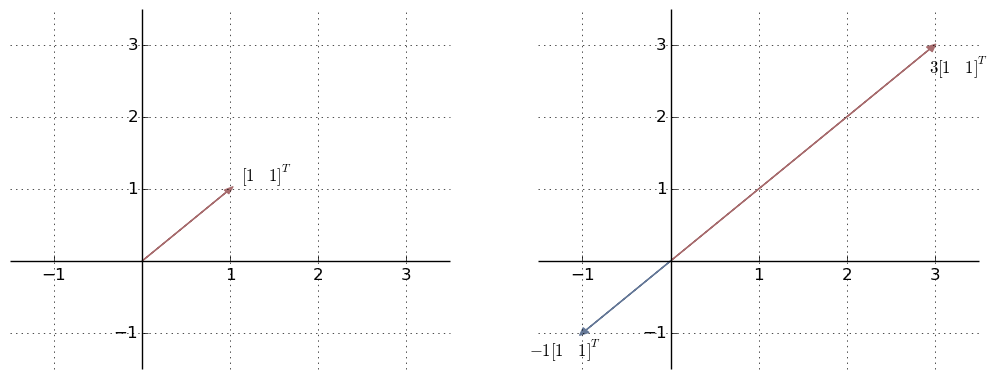

In [23]:
mycolors = {"green"=>"#6a9373","red"=>"#a76c6e","blue"=>"#657897"}
x = linspace(-1,5,50)
subplot(121)
ax = gca()
arrow(0, 0, 0.96, 0.96, head_width=0.07, head_length=0.1, fc=mycolors["red"], ec=mycolors["red"])
figtext(.31,.52, L"[1 \hspace{1.0} 1]^T");
ax[:set_ylim]([-1.5,3.5])
ax[:set_xlim]([-1.5,3.5])
ax[:spines]["top"][:set_color]("none") 
ax[:spines]["right"][:set_color]("none") 
ax[:spines]["left"][:set_position](("data", 0))
ax[:spines]["bottom"][:set_position](("data", 0))
ax[:xaxis][:set_ticks_position]("bottom")
ax[:yaxis][:set_ticks_position]("left")
ax[:xaxis][:grid]("True")
ax[:yaxis][:grid]("True")
yticks([-1, 1, 2, 3],)
xticks([-1, 1, 2, 3],)
margins(0.5);
subplot(122)
ax = gca()
arrow(0, 0, 2.94, 2.94, head_width=0.09, head_length=0.1, fc=mycolors["red"], ec=mycolors["red"])
figtext(.86,.76, L"3[1 \hspace{1.0} 1]^T");
arrow(0, 0, -0.96, -0.96, head_width=0.09, head_length=0.1, fc=mycolors["blue"], ec=mycolors["blue"])
figtext(.54,.13, L"-1[1 \hspace{1.0} 1]^T");
ax[:set_ylim]([-1.5,3.5])
ax[:set_xlim]([-1.5,3.5])
ax[:spines]["top"][:set_color]("none") 
ax[:spines]["right"][:set_color]("none") 
ax[:spines]["left"][:set_position](("data", 0))
ax[:spines]["bottom"][:set_position](("data", 0))
ax[:xaxis][:set_ticks_position]("bottom")
ax[:yaxis][:set_ticks_position]("left")
ax[:xaxis][:grid]("True")
ax[:yaxis][:grid]("True")
yticks([-1, 1, 2, 3],)
xticks([-1, 1, 2, 3],)
margins(0.5);
fig = gcf(); fig[:set_size_inches](12.5, 4.5);

###Linear Combinations

We saw a specific example of a linear combination of two vectors in Example 3 above.  A lot of times instead of talking about a particular linear combination of vectors, it is instructive to talk about **all possible linear combination** of vectors.  This will be important when solving systems of linear equations, which can be rephrased as given a target vector ${\bf b}$ and two vectors ${\bf u}$ and ${\bf v}$, what linear combination of ${\bf u}$ and ${\bf v}$ gives me ${\bf b}$. 

Consider the two vectors ${\bf u} = \mymat{2 \\ 1}$ and ${\bf v} = \mymat{-1 \\ 1}$


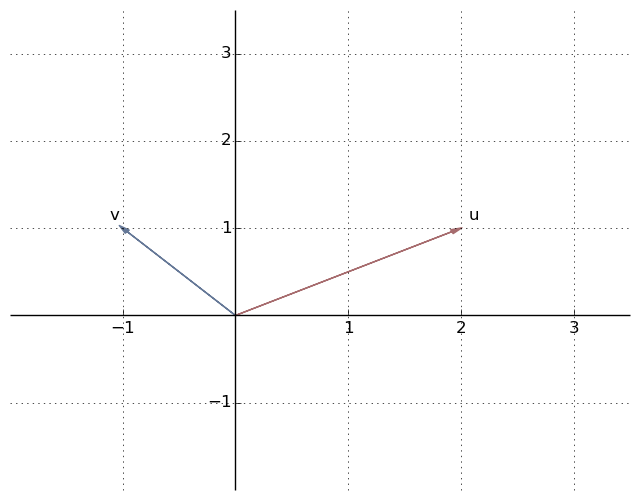

In [31]:
mycolors = {"green"=>"#6a9373","red"=>"#a76c6e","blue"=>"#657897"}
u = [2;1]
v = [-1;1]
sf = 0.96
arrow(0, 0, sf*u[1], sf*u[2], head_width=0.05, head_length=0.1, fc=mycolors["red"], ec=mycolors["red"])
figtext(.7,.55,"u")
arrow(0, 0, sf*v[1], sf*v[2], head_width=0.05, head_length=0.1, fc=mycolors["blue"], ec=mycolors["blue"])
figtext(.25,.55,"v")
ax = gca()
ax[:set_ylim]([-2,3.5])
ax[:set_xlim]([-2,3.5])
ax[:spines]["top"][:set_color]("none") 
ax[:spines]["right"][:set_color]("none") 
ax[:spines]["left"][:set_position](("data", 0))
ax[:spines]["bottom"][:set_position](("data", 0))
ax[:xaxis][:set_ticks_position]("bottom")
ax[:yaxis][:set_ticks_position]("left")
ax[:xaxis][:grid]("True")
ax[:yaxis][:grid]("True")
yticks([-1, 1, 2, 3],)
xticks([-1, 1, 2, 3],)
margins(0.3);

Different linear combinations of $\bu$ and $\bv$ take us to different places in the 2D plane.  Let's visualize a bunch of them. 

<br><br><br><br><br><br><br><br>